In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import json 
import codecs

In [3]:
with codecs.open('Audio_CRNN_100_History.json','r',encoding ='utf8') as infile:
    History = json.load(infile)

In [4]:
History.keys()

dict_keys(['val_loss', 'val_auc', 'loss', 'auc', 'AUC_test', 'Timer'])

In [5]:
epcho_num = [x+1 for x in range(100)] # this  is x

In [41]:
coefficients = np.polyfit(epcho_num,History['AUC_test'],10)
p = np.poly1d(coefficients)

(0, 0.6)

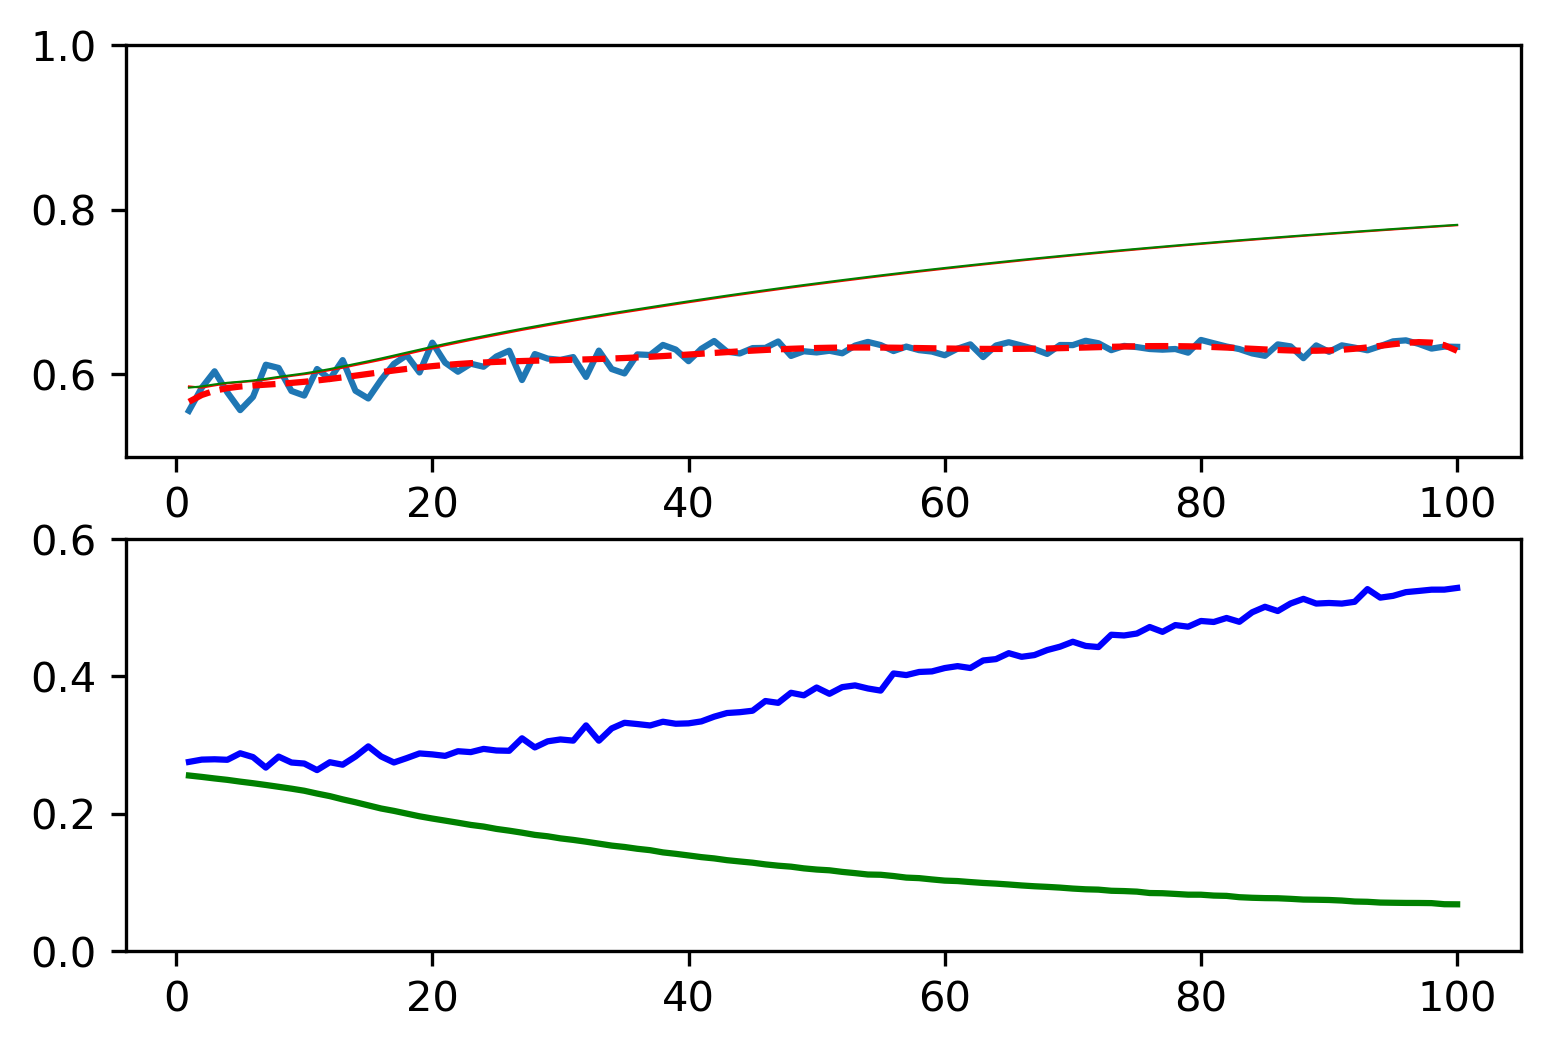

In [44]:
fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(211)
ax1.plot(epcho_num,History['AUC_test'],)
ax1.plot(epcho_num,History['auc'],lw=0.5,color = 'r')
ax1.plot(epcho_num,History['val_auc'],lw=0.5,color = 'g')
ax1.plot(epcho_num,p(epcho_num),"r--")
ax1.set_ylim(0.5,1)
#ax2 = ax1.twinx()
ax2 = fig.add_subplot(212)
ax2.plot(epcho_num,History['loss'],'g')
ax2.plot(epcho_num,History['val_loss'],'b')
ax2.set_ylim(0,0.6)

In [26]:
History['val_loss'].index(np.array(History['val_loss']).min())

10

In [35]:
import heapq
num_larg = 11
History['AUC_test'].index(History['AUC_test'][10])

10

In [37]:
loss_cross = np.array(History['val_loss'])-np.array(History['loss'])

In [40]:
list(loss_cross).index(loss_cross.min())

0